In [338]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
from plotly.offline import iplot
import collections
import numpy as np

### Cargar los datos de asesinatos 

In [339]:
AsesPolicia=pd.DataFrame(pd.read_csv('PoliciaAsesinatos.csv'))
AsesPolicia['date'] = AsesPolicia['date'].astype('datetime64[ns]')
AsesPolicia

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,2015-02-01,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,2015-02-01,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,2015-03-01,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,2015-04-01,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,2015-04-01,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2530,2822,Rodney E. Jacobs,2017-07-28,shot,gun,31.0,M,NaN,Kansas City,MO,False,attack,Not fleeing,False
2531,2813,TK TK,2017-07-28,shot,vehicle,NaN,M,NaN,Albuquerque,NM,False,attack,Car,False
2532,2818,Dennis W. Robinson,2017-07-29,shot,gun,48.0,M,NaN,Melba,ID,False,attack,Car,False
2533,2817,Isaiah Tucker,2017-07-31,shot,vehicle,28.0,M,B,Oshkosh,WI,False,attack,Car,True


### Dar formato a la columna date y ver el dia menor, mayor y cantidad de dias

In [340]:
    Fecha_min = min(AsesPolicia['date'])
    print(min(AsesPolicia['date']))
    Fecha_max = max(AsesPolicia['date'])
    print(max(AsesPolicia['date']))
print(str(Fecha_max - Fecha_min))

2015-01-03 00:00:00
2017-12-07 00:00:00
1069 days 00:00:00


### Ver la proporcion de datos faltantes por columnas

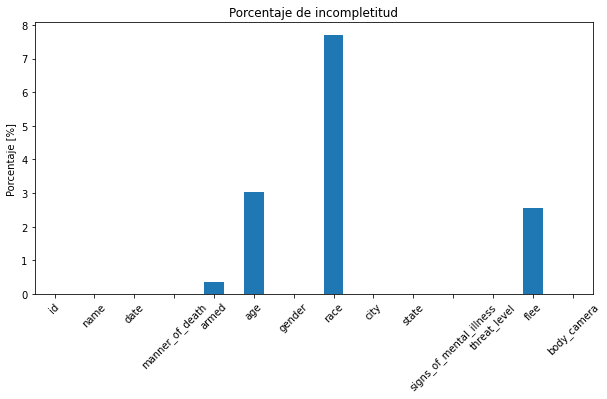

In [341]:
def graficar_cantidad_nulos(dataframe):
  data_auxiliar = dataframe.copy()
  tasa_de_vacio = round(data_auxiliar.isnull().mean()*100,3)
  plt.figure(figsize=(10,5))
  tasa_de_vacio.plot(kind = 'bar')
  plt.title('Porcentaje de incompletitud')
  plt.ylabel('Porcentaje [%]')
  plt.xticks(rotation=45)
  plt.show()


graficar_cantidad_nulos(AsesPolicia)    

- ### a. Análisis descriptivo de las variables manner_of_death y armed utilizando características sociodemográficas (age, gender, race, etc)

## Graficas descriptivas de la variable modo de muerte

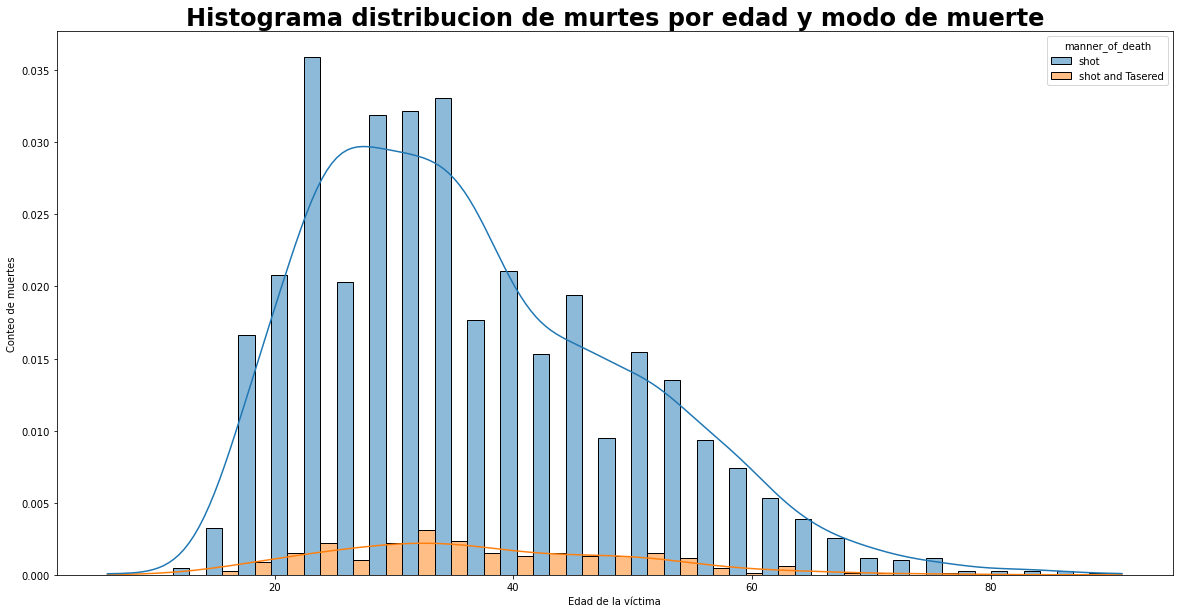

In [342]:
plt.figure(figsize=(20,10))
sns.histplot(x='age',data=AsesPolicia, hue='manner_of_death', multiple="dodge", stat="density", kde=True)
plt.xlabel("Edad de la víctima")
plt.ylabel("Conteo de muertes")
plt.title('Histograma distribucion de murtes por edad y modo de muerte', weight='bold', size=24, y=1)
plt.show()

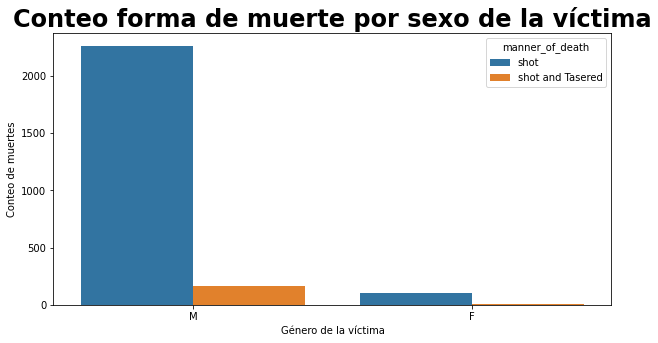

In [343]:
plt.figure(figsize=(10,5))
sns.countplot(x='gender',data=AsesPolicia, hue='manner_of_death')
plt.xlabel("Género de la víctima")
plt.ylabel("Conteo de muertes")
plt.title('Conteo forma de muerte por sexo de la víctima', weight='bold', size=24, y=1)
plt.show()

In [344]:
AsesPolicia['race'].replace({"W":"White", "B":"Black", "H":"Hispanic", "A":"Asian", "N":"Otro", "O":"Otro"}, inplace=True)

In [345]:
manner_of_death = pd.value_counts(AsesPolicia['race'], dropna=False)
labels = manner_of_death.index.to_list()
values = manner_of_death.to_list()
title = 'Muertes totales por Raza de la víctima'
trace = go.Pie(labels=labels, values=values)
layout =  go.Layout(
    title=title,
          height=600,
          margin=go.Margin(l=0, r=200, b=100, t=100, pad=4)   
          ) 
fig = go.Figure(data=[trace], layout=layout)
iplot(fig)

/usr/local/lib/python3.8/dist-packages/plotly/graph_objs/_deprecations.py:405: DeprecationWarning:

plotly.graph_objs.Margin is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.layout.Margin




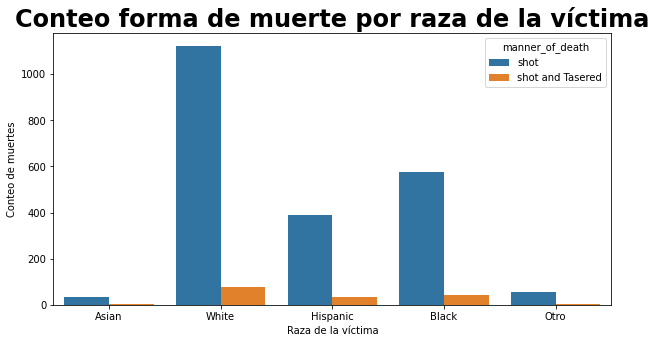

In [346]:
plt.figure(figsize=(10,5))
sns.countplot(x='race',data=AsesPolicia, hue='manner_of_death')
plt.xlabel("Raza de la víctima")
plt.ylabel("Conteo de muertes")
plt.title('Conteo forma de muerte por raza de la víctima', weight='bold', size=24, y=1)
plt.show()

In [347]:
AsesPolicia['armed']=AsesPolicia[['armed']].astype(str)

In [348]:
listaArmas=" ".join([arma for arma in AsesPolicia['armed']]).split()
len(listaArmas)

2750

In [349]:
ocurrencias=collections.Counter(listaArmas)

### frecuencia de asesinatos por tipo de arma

In [350]:
Conteo_Armas = pd.DataFrame([[key, ocurrencias[key]] for key in ocurrencias.keys()], columns=['Arma', 'Frecuencia']) #Crear un datafreame con la frecuencia
Conteo_Armas = Conteo_Armas.sort_values('Frecuencia', ascending=False) #Ordenar de forma descendente
Conteo_Armas=Conteo_Armas[Conteo_Armas['Frecuencia']>=7]
Conteo_Armas.reset_index(drop=True)

,Arma,Frecuencia
0,gun,1408
1,knife,379
2,vehicle,177
3,unarmed,171
4,weapon,122
5,undetermined,117
6,toy,104
7,machete,19
8,unknown,18
9,metal,16


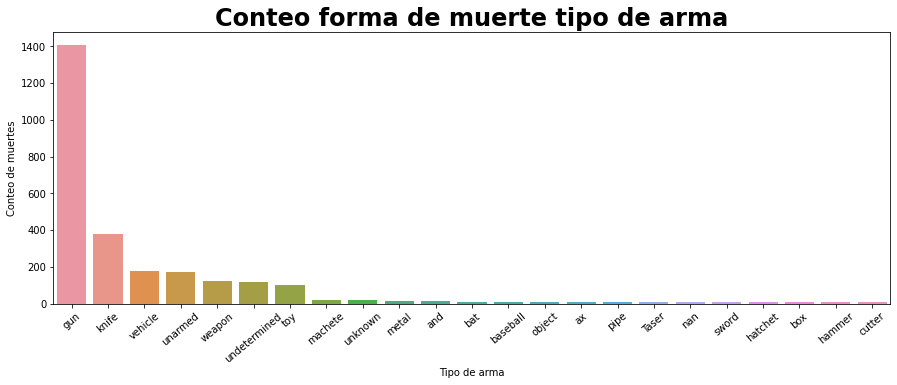

In [351]:
plt.figure(figsize=(15,5))
sns.barplot(x="Arma", y="Frecuencia", data=Conteo_Armas)
plt.xlabel("Tipo de arma")
plt.ylabel("Conteo de muertes")
plt.title('Conteo forma de muerte tipo de arma', weight='bold', size=24, y=1)
plt.xticks(rotation=40)
plt.show()

### Generar columna day para ver en que dia de la semana ocurren los homicidios

In [352]:
AsesPolicia['day'] = AsesPolicia['date'].apply(lambda x: x.weekday())

In [353]:
AsesPolicia

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,day
0,3,Tim Elliot,2015-02-01,shot,gun,53.0,M,Asian,Shelton,WA,True,attack,Not fleeing,False,6
1,4,Lewis Lee Lembke,2015-02-01,shot,gun,47.0,M,White,Aloha,OR,False,attack,Not fleeing,False,6
2,5,John Paul Quintero,2015-03-01,shot and Tasered,unarmed,23.0,M,Hispanic,Wichita,KS,False,other,Not fleeing,False,6
3,8,Matthew Hoffman,2015-04-01,shot,toy weapon,32.0,M,White,San Francisco,CA,True,attack,Not fleeing,False,2
4,9,Michael Rodriguez,2015-04-01,shot,nail gun,39.0,M,Hispanic,Evans,CO,False,attack,Not fleeing,False,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2530,2822,Rodney E. Jacobs,2017-07-28,shot,gun,31.0,M,NaN,Kansas City,MO,False,attack,Not fleeing,False,4
2531,2813,TK TK,2017-07-28,shot,vehicle,NaN,M,NaN,Albuquerque,NM,False,attack,Car,False,4
2532,2818,Dennis W. Robinson,2017-07-29,shot,gun,48.0,M,NaN,Melba,ID,False,attack,Car,False,5
2533,2817,Isaiah Tucker,2017-07-31,shot,vehicle,28.0,M,Black,Oshkosh,WI,False,attack,Car,True,0


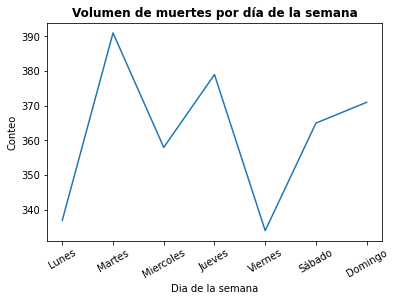

,Counting,d_w
0,337,Lunes
1,391,Martes
2,358,Miercoles
3,379,Jueves
4,334,Viernes
5,365,Sábado
6,371,Domingo


In [354]:
muertes_dia = pd.DataFrame(AsesPolicia['day'].value_counts().sort_index())
muertes_dia['d_w'] = ['Lunes', 'Martes', 'Miercoles', 'Jueves', 'Viernes', 'Sábado', 'Domingo']
muertes_dia = muertes_dia.rename(columns={'day':'Counting'})
plt.figure()
sns.lineplot(data=muertes_dia, x=muertes_dia.d_w, y='Counting',linewidth = 1.5)
plt.title('Volumen de muertes por día de la semana', weight='bold')
plt.xlabel("Dia de la semana")
plt.ylabel("Conteo")
plt.xticks(rotation=30)
plt.show()
print()
muertes_dia

- ### b. Evolución en el tiempo de las muertes por estado (Seleccione los 5 estados con más muertes para facilitar la visualización)

### Muertes por estado

In [355]:
DeathByState=" ".join([arma for arma in AsesPolicia['state']]).split()
len(DeathByState)

2535

### Ver la frecuencia de muertes por estado para sacar los 5 mas significativoss

In [356]:
FreqEstate=collections.Counter(DeathByState)
Conteo_State = pd.DataFrame([[key, FreqEstate[key]] for key in FreqEstate.keys()], columns=['Estado', 'Frecuencia']) #Crear un datafreame con la frecuencia
Conteo_State = Conteo_State.sort_values('Frecuencia', ascending=False) #Ordenar de forma descendente
#Conteo_State=Conteo_State[Conteo_State['Frecuencia']
Conteo_State=Conteo_State.reset_index(drop=True)
Conteo_State.iloc[:5]

,Estado,Frecuencia
0,CA,424
1,TX,225
2,FL,154
3,AZ,118
4,OH,79


In [357]:
df_state=AsesPolicia[AsesPolicia['state'].isin(['CA', 'TX', 'FL', 'AZ', 'OH'])]
df_state

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,day
3,8,Matthew Hoffman,2015-04-01,shot,toy weapon,32.0,M,White,San Francisco,CA,True,attack,Not fleeing,False,2
6,13,Kenneth Arnold Buck,2015-05-01,shot,gun,22.0,M,Hispanic,Chandler,AZ,False,attack,Car,False,4
10,19,Patrick Wetter,2015-06-01,shot and Tasered,knife,25.0,M,White,Stockton,CA,False,attack,Not fleeing,False,0
11,21,Ron Sneed,2015-07-01,shot,gun,31.0,M,Black,Freeport,TX,False,attack,Not fleeing,False,2
12,22,Hashim Hanif Ibn Abdul-Rasheed,2015-07-01,shot,knife,41.0,M,Black,Columbus,OH,True,other,Not fleeing,False,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2522,2807,Susan Teel,2017-07-26,shot,knife,62.0,F,NaN,Vero Beach,FL,True,attack,Not fleeing,False,2
2523,2808,Kesharn K. Burney,2017-07-26,shot,vehicle,25.0,M,Black,Dayton,OH,False,attack,Car,False,2
2524,2816,Jerauld Phillip Hammond II,2017-07-27,shot,gun,46.0,M,NaN,Los Angeles,CA,False,other,Not fleeing,False,3
2526,2809,Sergio Velasco-Martinez,2017-07-27,shot,blunt object,25.0,M,NaN,Avenal,CA,False,attack,Not fleeing,False,3


In [358]:
data=pd.DataFrame()
data['CA']=df_state.loc[df_state['state']=='CA']['date'].value_counts().sort_index()
data['TX']=df_state.loc[df_state['state']=='TX']['date'].value_counts().sort_index()
data['FL']=df_state.loc[df_state['state']=='FL']['date'].value_counts().sort_index()
data['AZ']=df_state.loc[df_state['state']=='AZ']['date'].value_counts().sort_index()
data['OH']=df_state.loc[df_state['state']=='OH']['date'].value_counts().sort_index()
data

,CA,TX,FL,AZ,OH
2015-01-03,1,1.0,NaN,NaN,NaN
2015-01-04,1,NaN,NaN,NaN,NaN
2015-01-11,1,NaN,NaN,NaN,NaN
2015-01-12,1,NaN,NaN,NaN,NaN
2015-01-15,1,NaN,NaN,NaN,NaN
...,...,...,...,...,...
2017-12-02,1,1.0,NaN,NaN,NaN
2017-12-03,1,NaN,NaN,NaN,NaN
2017-12-04,1,NaN,NaN,NaN,NaN
2017-12-06,1,1.0,NaN,NaN,NaN


In [359]:
data.index = data.index.astype('datetime64[ns]')

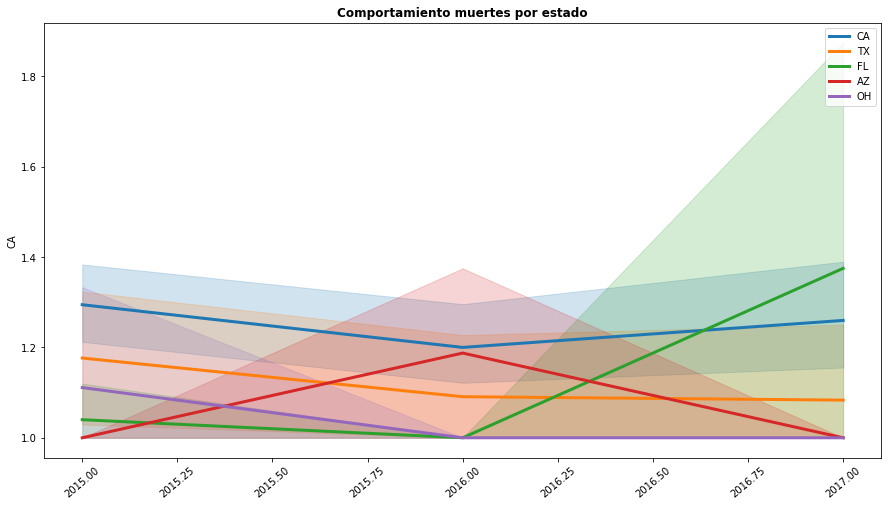

In [360]:
Muertes_state=df_state['date'].value_counts().sort_index()

plt.figure(figsize=(15,8))
sns.lineplot(data=data, x=data.index.year, y=data.CA, label='CA',linewidth=3)
sns.lineplot(data=data, x=data.index.year, y=data.TX, label='TX',linewidth=3)
sns.lineplot(data=data, x=data.index.year, y=data.FL, label='FL',linewidth=3)
sns.lineplot(data=data, x=data.index.year, y=data.AZ, label='AZ',linewidth=3)
sns.lineplot(data=data, x=data.index.year, y=data.OH, label='OH',linewidth=3)
plt.title('Comportamiento muertes por estado', weight='bold')
plt.xticks(rotation=40)
plt.show()



- ### b. Realice un análisis del ingreso, escolaridad, raza y pobreza para cada uno de los 5 estados

### Analisis ingreso, raza, escolaridad y pobreza
#### - Cargar datos

In [361]:
educacion=pd.DataFrame(pd.read_csv('EducacionCiudades.csv'))
educacion

,Geographic Area,City,percent_completed_hs
0,AL,Abanda CDP,21.2
1,AL,Abbeville city,69.1
2,AL,Adamsville city,78.9
3,AL,Addison town,81.4
4,AL,Akron town,68.6
...,...,...,...
29324,WY,Woods Landing-Jelm CDP,100
29325,WY,Worland city,85.6
29326,WY,Wright town,89.2
29327,WY,Yoder town,79.4


In [362]:
ingreso=pd.DataFrame(pd.read_csv('IngresoCiudades.csv'))
ingreso

,Geographic Area,City,Median Income
0,AL,Abanda CDP,11207
1,AL,Abbeville city,25615
2,AL,Adamsville city,42575
3,AL,Addison town,37083
4,AL,Akron town,21667
...,...,...,...
29317,WY,Woods Landing-Jelm CDP,NaN
29318,WY,Worland city,41523
29319,WY,Wright town,77114
29320,WY,Yoder town,37500


In [363]:
pobreza=pd.DataFrame(pd.read_csv('PobrezaCiudades.csv'))
pobreza

,Geographic Area,City,poverty_rate
0,AL,Abanda CDP,78.8
1,AL,Abbeville city,29.1
2,AL,Adamsville city,25.5
3,AL,Addison town,30.7
4,AL,Akron town,42
...,...,...,...
29324,WY,Woods Landing-Jelm CDP,18.6
29325,WY,Worland city,15.3
29326,WY,Wright town,5.9
29327,WY,Yoder town,5.4


In [364]:
raza=pd.DataFrame(pd.read_csv('RazaCiudades.csv'))
raza.rename(columns={'Geographic area':'Geographic Area'}, inplace=True)
raza

,Geographic Area,City,share_white,share_black,share_native_american,share_asian,share_hispanic
0,AL,Abanda CDP,67.2,30.2,0,0,1.6
1,AL,Abbeville city,54.4,41.4,0.1,1,3.1
2,AL,Adamsville city,52.3,44.9,0.5,0.3,2.3
3,AL,Addison town,99.1,0.1,0,0.1,0.4
4,AL,Akron town,13.2,86.5,0,0,0.3
...,...,...,...,...,...,...,...
29263,WY,Woods Landing-Jelm CDP,95.9,0,0,2.1,0
29264,WY,Worland city,89.9,0.3,1.3,0.6,16.6
29265,WY,Wright town,94.5,0.1,1.4,0.2,6.2
29266,WY,Yoder town,97.4,0,0,0,4


### Hacer merge con los dataframes por "City" y "Geographic Area" que son las variables que se repiten en todos

In [365]:
datos_sDemog= pd.merge(pd.merge(pd.merge(educacion,ingreso, on=['City', 'Geographic Area']), pobreza, on = ['City', 'Geographic Area']), raza, on =['City', 'Geographic Area'])
datos_sDemog=datos_sDemog[datos_sDemog['Geographic Area'].isin(['CA', 'TX', 'FL', 'AZ', 'OH'])]
datos_sDemog['percent_completed_hs']=pd.to_numeric(datos_sDemog['percent_completed_hs'], errors='coerce')
datos_sDemog['Median Income']=pd.to_numeric(datos_sDemog['Median Income'], errors='coerce')
datos_sDemog['poverty_rate']=pd.to_numeric(datos_sDemog['poverty_rate'], errors='coerce')
datos_sDemog['share_white']=pd.to_numeric(datos_sDemog['share_white'], errors='coerce')
datos_sDemog['share_black']=pd.to_numeric(datos_sDemog['share_black'], errors='coerce')
datos_sDemog['share_native_american']=pd.to_numeric(datos_sDemog['share_native_american'], errors='coerce')
datos_sDemog['share_hispanic']=pd.to_numeric(datos_sDemog['share_hispanic'], errors='coerce')
datos_sDemog['share_asian']=pd.to_numeric(datos_sDemog['share_asian'], errors='coerce')
datos_sDemog

,Geographic Area,City,percent_completed_hs,Median Income,poverty_rate,share_white,share_black,share_native_american,share_asian,share_hispanic
930,AZ,Aguila CDP,26.1,26842.0,57.4,64.7,1.0,3.6,0.4,69.4
931,AZ,Ajo CDP,80.0,32964.0,33.6,75.1,0.9,9.9,1.1,38.3
932,AZ,Ak Chin CDP,100.0,NaN,12.1,0.0,0.0,100.0,0.0,3.3
933,AZ,Ak-Chin Village CDP,59.8,25197.0,54.5,2.7,0.6,75.4,0.0,27.5
934,AZ,Alamo Lake CDP,100.0,NaN,0.0,100.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
26091,TX,Zapata CDP,57.7,37088.0,17.8,92.4,0.0,0.1,0.2,95.0
26092,TX,Zapata Ranch CDP,95.1,49732.0,3.0,85.2,0.0,0.0,0.0,98.1
26093,TX,Zarate CDP,100.0,NaN,0.0,100.0,0.0,0.0,0.0,100.0
26094,TX,Zavalla city,72.2,28500.0,35.2,97.1,0.7,0.7,0.0,1.4


<ipython-input-366-443990d31770>:13: UserWarning:

Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.



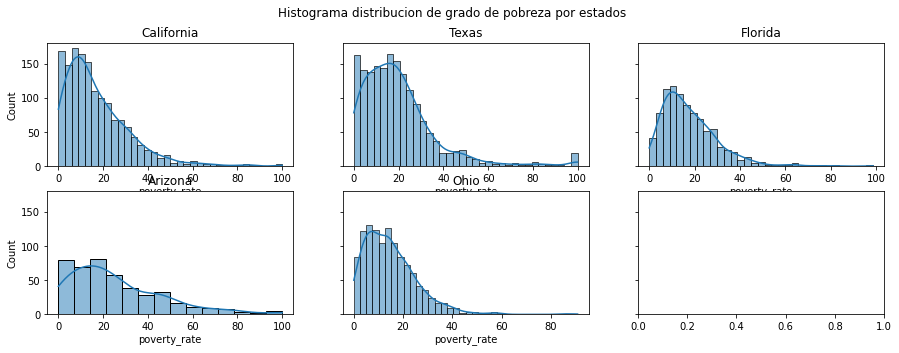

In [366]:
fig, axes = plt.subplots(2, 3, figsize=(15, 5), sharey=True)
fig.suptitle('Histograma distribucion de grado de pobreza por estados')
x_CA=datos_sDemog[datos_sDemog['Geographic Area']=='CA']
x_TX=datos_sDemog[datos_sDemog['Geographic Area']=='TX']
x_FL=datos_sDemog[datos_sDemog['Geographic Area']=='FL']
x_AZ=datos_sDemog[datos_sDemog['Geographic Area']=='AZ']
x_OH=datos_sDemog[datos_sDemog['Geographic Area']=='OH']
sns.histplot(ax=axes[0, 0], x='poverty_rate',data=x_CA, kde=True).set_title('California')
sns.histplot(ax=axes[0, 1], x='poverty_rate',data=x_TX, kde=True).set_title('Texas')
sns.histplot(ax=axes[0, 2], x='poverty_rate',data=x_FL, kde=True).set_title('Florida')
sns.histplot(ax=axes[1, 0], x='poverty_rate',data=x_AZ, kde=True).set_title('Arizona')
sns.histplot(ax=axes[1, 1], x='poverty_rate',data=x_OH, kde=True).set_title('Ohio')
fig.show()

<ipython-input-367-3966717d9b1a>:8: UserWarning:

Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.



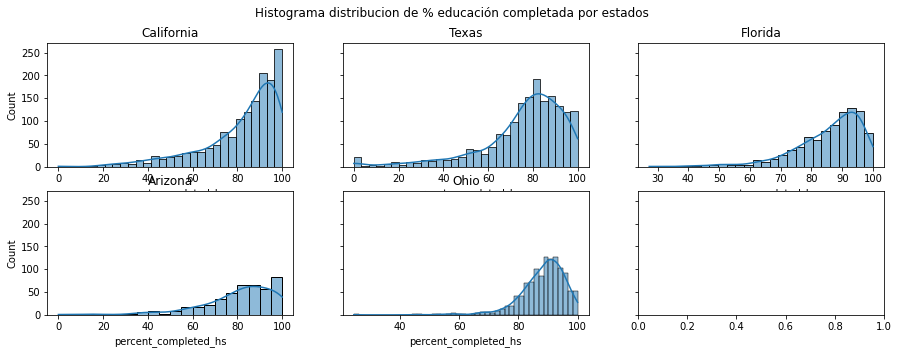

In [367]:
fig, axes = plt.subplots(2, 3, figsize=(15, 5), sharey=True)
fig.suptitle('Histograma distribucion de % educación completada por estados')
sns.histplot(ax=axes[0, 0], x='percent_completed_hs',data=x_CA, kde=True).set_title("California")
sns.histplot(ax=axes[0, 1], x='percent_completed_hs',data=x_TX, kde=True).set_title("Texas")
sns.histplot(ax=axes[0, 2], x='percent_completed_hs',data=x_FL, kde=True).set_title("Florida")
sns.histplot(ax=axes[1, 0], x='percent_completed_hs',data=x_AZ, kde=True).set_title("Arizona")
sns.histplot(ax=axes[1, 1], x='percent_completed_hs',data=x_OH, kde=True).set_title("Ohio")
fig.show()

<ipython-input-368-064ca37d60e0>:8: UserWarning:

Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.



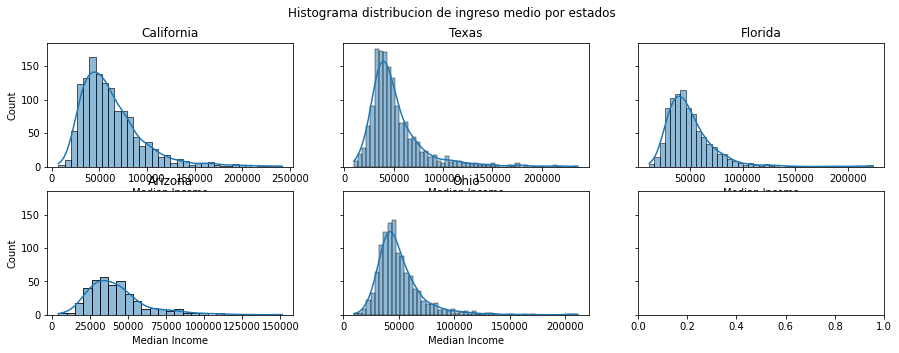

In [368]:
fig, axes = plt.subplots(2, 3, figsize=(15, 5), sharey=True)
fig.suptitle('Histograma distribucion de ingreso medio por estados')
sns.histplot(ax=axes[0, 0], x='Median Income',data=x_CA, kde=True).set_title('California')
sns.histplot(ax=axes[0, 1], x='Median Income',data=x_TX, kde=True).set_title('Texas')
sns.histplot(ax=axes[0, 2], x='Median Income',data=x_FL, kde=True).set_title('Florida')
sns.histplot(ax=axes[1, 0], x='Median Income',data=x_AZ, kde=True).set_title('Arizona')
sns.histplot(ax=axes[1, 1], x='Median Income',data=x_OH, kde=True).set_title('Ohio')
fig.show()

### Distribución de razas por estados

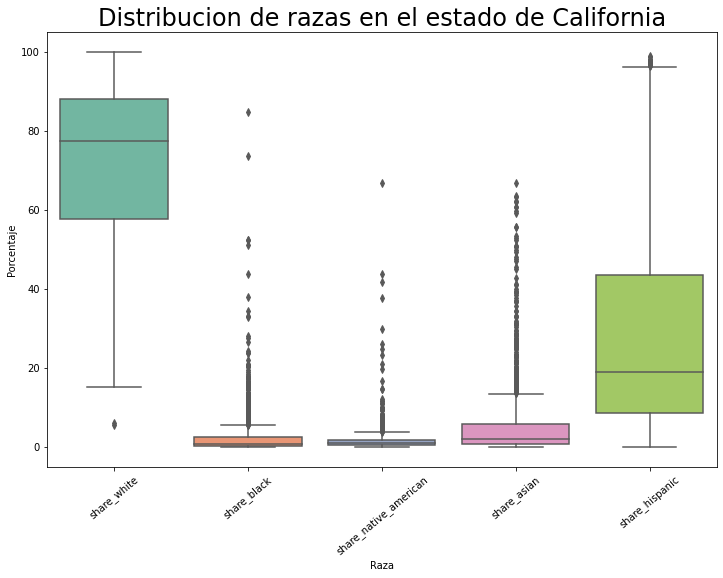

In [369]:
x_CAbox=x_CA[['share_white', 'share_black', 'share_native_american', 'share_asian', 'share_hispanic']]

plt.figure(figsize=(12,8))
sns.boxplot(data=x_CAbox, orient="v", palette="Set2")
plt.xlabel("Raza")
plt.ylabel("Porcentaje")
plt.title('Distribucion de razas en el estado de California', size=24)
plt.xticks(rotation=40)
plt.show()

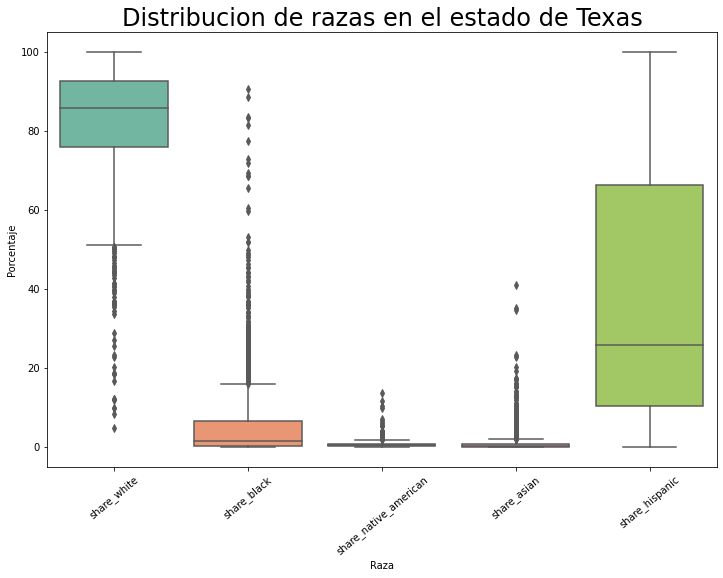

In [370]:
x_TXbox=x_TX[['share_white', 'share_black', 'share_native_american', 'share_asian', 'share_hispanic']]

plt.figure(figsize=(12,8))
sns.boxplot(data=x_TXbox, orient="v", palette="Set2")
plt.xlabel("Raza")
plt.ylabel("Porcentaje")
plt.title('Distribucion de razas en el estado de Texas', size=24)
plt.xticks(rotation=40)
plt.show()

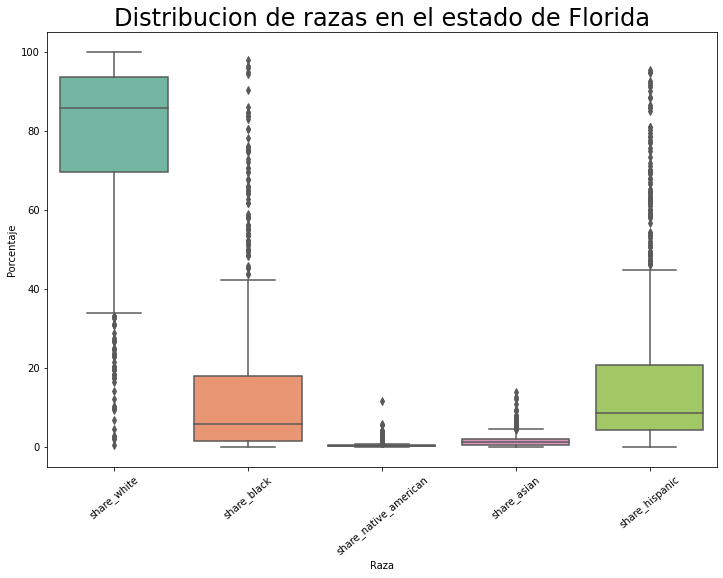

In [371]:
x_FLbox=x_FL[['share_white', 'share_black', 'share_native_american', 'share_asian', 'share_hispanic']]

plt.figure(figsize=(12,8))
sns.boxplot(data=x_FLbox, orient="v", palette="Set2")
plt.xlabel("Raza")
plt.ylabel("Porcentaje")
plt.title('Distribucion de razas en el estado de Florida', size=24)
plt.xticks(rotation=40)
plt.show()

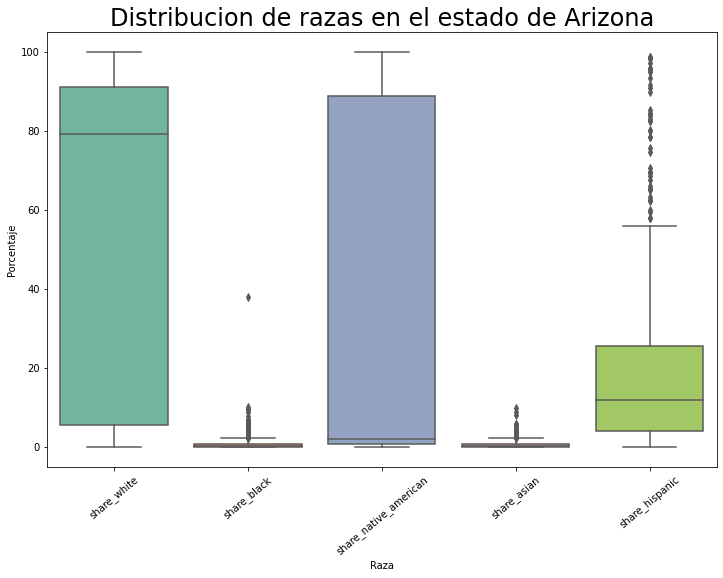

In [372]:
x_AZbox=x_AZ[['share_white', 'share_black', 'share_native_american', 'share_asian', 'share_hispanic']]

plt.figure(figsize=(12,8))
sns.boxplot(data=x_AZbox, orient="v", palette="Set2")
plt.xlabel("Raza")
plt.ylabel("Porcentaje")
plt.title('Distribucion de razas en el estado de Arizona', size=24)
plt.xticks(rotation=40)
plt.show()

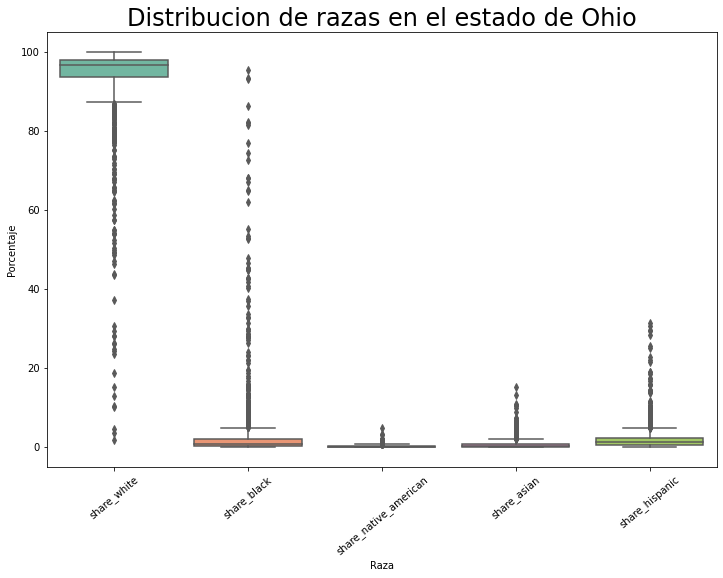

In [373]:
x_OHbox=x_OH[['share_white', 'share_black', 'share_native_american', 'share_asian', 'share_hispanic']]

plt.figure(figsize=(12,8))
sns.boxplot(data=x_OHbox, orient="v", palette="Set2")
plt.xlabel("Raza")
plt.ylabel("Porcentaje")
plt.title('Distribucion de razas en el estado de Ohio', size=24)
plt.xticks(rotation=40)
plt.show()

### Modelo

In [374]:
AsesPolicia.drop(columns=['city', 'day', 'name', 'date'], inplace=True)

In [375]:
AsesPolicia

,id,manner_of_death,armed,age,gender,race,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,shot,gun,53.0,M,Asian,WA,True,attack,Not fleeing,False
1,4,shot,gun,47.0,M,White,OR,False,attack,Not fleeing,False
2,5,shot and Tasered,unarmed,23.0,M,Hispanic,KS,False,other,Not fleeing,False
3,8,shot,toy weapon,32.0,M,White,CA,True,attack,Not fleeing,False
4,9,shot,nail gun,39.0,M,Hispanic,CO,False,attack,Not fleeing,False
...,...,...,...,...,...,...,...,...,...,...,...
2530,2822,shot,gun,31.0,M,NaN,MO,False,attack,Not fleeing,False
2531,2813,shot,vehicle,NaN,M,NaN,NM,False,attack,Car,False
2532,2818,shot,gun,48.0,M,NaN,ID,False,attack,Car,False
2533,2817,shot,vehicle,28.0,M,Black,WI,False,attack,Car,True


### Generar dummies para convertir a números las variables categóricas

In [376]:


AsesPolicia = pd.get_dummies(AsesPolicia, columns=["manner_of_death", "armed", "gender", "state",
                                                       "signs_of_mental_illness", "threat_level", "flee", "body_camera"])
AsesPolicia

,id,age,race,manner_of_death_shot,manner_of_death_shot and Tasered,armed_Taser,armed_air conditioner,armed_ax,armed_baseball bat,armed_baseball bat and bottle,...,signs_of_mental_illness_True,threat_level_attack,threat_level_other,threat_level_undetermined,flee_Car,flee_Foot,flee_Not fleeing,flee_Other,body_camera_False,body_camera_True
0,3,53.0,Asian,1,0,0,0,0,0,0,...,1,1,0,0,0,0,1,0,1,0
1,4,47.0,White,1,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,1,0
2,5,23.0,Hispanic,0,1,0,0,0,0,0,...,0,0,1,0,0,0,1,0,1,0
3,8,32.0,White,1,0,0,0,0,0,0,...,1,1,0,0,0,0,1,0,1,0
4,9,39.0,Hispanic,1,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2530,2822,31.0,NaN,1,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,1,0
2531,2813,NaN,NaN,1,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,1,0
2532,2818,48.0,NaN,1,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,1,0
2533,2817,28.0,Black,1,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,1


### Eliminar filas con datos faltantes

In [377]:
AsesPolicia.dropna(inplace=True)


### Se evidencia que la variable a predeir esta bastante desbalanceada

In [378]:
AsesPolicia['race'].value_counts()

White       1192
Black        609
Hispanic     413
Otro          59
Asian         38
Name: race, dtype: int64

In [379]:
# Convertir la variable a dependiente a numeros
AsesPolicia['race'].replace({'White':0, 'Black':1, 'Hispanic':2, 'Otro':3, 'Asian':4}, inplace=True)
AsesPolicia

,id,age,race,manner_of_death_shot,manner_of_death_shot and Tasered,armed_Taser,armed_air conditioner,armed_ax,armed_baseball bat,armed_baseball bat and bottle,...,signs_of_mental_illness_True,threat_level_attack,threat_level_other,threat_level_undetermined,flee_Car,flee_Foot,flee_Not fleeing,flee_Other,body_camera_False,body_camera_True
0,3,53.0,4,1,0,0,0,0,0,0,...,1,1,0,0,0,0,1,0,1,0
1,4,47.0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,1,0
2,5,23.0,2,0,1,0,0,0,0,0,...,0,0,1,0,0,0,1,0,1,0
3,8,32.0,0,1,0,0,0,0,0,0,...,1,1,0,0,0,0,1,0,1,0
4,9,39.0,2,1,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2519,2805,16.0,1,1,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,1,0
2523,2808,25.0,1,1,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,1,0
2525,2820,39.0,1,1,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,1,0
2533,2817,28.0,1,1,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,1


#### Se prueban diferentes modelos de para ver cual finciona mejor
- Naive Bayes
- Regresión logística
- Support vector machine
- Arbol de decision
- Random forest
- Gradient Boosting


In [380]:
from sklearn.naive_bayes import MultinomialNB 
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

### Se definen las variables independientes y la dependiente

In [381]:
X = np.array(AsesPolicia.drop(['race'],1))
y = np.array(AsesPolicia['race'])

In [382]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Tenemos {X.shape[0]} datos en total.")
print(f"El conjunto de datos de entrenamiento (train) tiene {X_train.shape[0]} datos.")
print(f"El conjunto de datos de prueba (test) tiene {X_test.shape[0]} datos.")
print(y_test.shape)

Tenemos 2311 datos en total.
El conjunto de datos de entrenamiento (train) tiene 1848 datos.
El conjunto de datos de prueba (test) tiene 463 datos.
(463,)


### Configurar clasificadores

In [383]:
nb = MultinomialNB()
logreg = LogisticRegression(class_weight='balanced', max_iter=1000)
svm = LinearSVC(class_weight='balanced')
dt = DecisionTreeClassifier(class_weight='balanced')
model = RandomForestClassifier(n_estimators=1000)
model_gb = GradientBoostingClassifier()

In [384]:
## Entrenar modelos
nb.fit(X_train, y_train)
logreg.fit(X_train, y_train)
svm.fit(X_train, y_train)
dt.fit(X_train, y_train)
model.fit(X_train, y_train)
model_gb.fit(X_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:985: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



GradientBoostingClassifier()

In [385]:
clf = DecisionTreeClassifier(random_state=0)
cross_val_score(clf, X_train, y_train, cv=10)

array([0.52432432, 0.51891892, 0.56756757, 0.44864865, 0.46486486,
       0.45945946, 0.43243243, 0.42162162, 0.4673913 , 0.49456522])

### Realizar predicciones

In [386]:
y_pred_nb = nb.predict(X_test)
y_pred_logreg = logreg.predict(X_test)
y_pred_svm = svm.predict(X_test)
y_pred_dt = dt.predict(X_test)
ypred = model.predict(X_test)
y_pred_gb = model_gb.predict(X_test)

In [387]:
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn import metrics

import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix

### Generar metricas para cada modelo

In [388]:
print("Naive Bayes")
print(classification_report(y_test, y_pred_nb))
print()

print("Regresión Logística")
print(classification_report(y_test, y_pred_logreg))
print()

print("SVM")
print(classification_report(y_test, y_pred_svm))
print()

print("Árbol de decisión")
print(classification_report(y_test, y_pred_dt))
print()

print("Random forest")
print(classification_report(y_test, ypred))
print()

print("Gradient Boosting")
print(classification_report(y_test, y_pred_gb))
print()


Naive Bayes
              precision    recall  f1-score   support

           0       0.57      0.56      0.57       245
           1       0.35      0.48      0.40       115
           2       0.42      0.30      0.35        89
           3       0.00      0.00      0.00         7
           4       0.00      0.00      0.00         7

    accuracy                           0.48       463
   macro avg       0.27      0.27      0.26       463
weighted avg       0.47      0.48      0.47       463


Regresión Logística
              precision    recall  f1-score   support

           0       0.74      0.45      0.56       245
           1       0.49      0.55      0.52       115
           2       0.47      0.51      0.49        89
           3       0.07      0.43      0.12         7
           4       0.02      0.14      0.04         7

    accuracy                           0.48       463
   macro avg       0.36      0.42      0.35       463
weighted avg       0.61      0.48      0.52 

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` param

##### Se evidencia que el modelo de random forest da un 60% de accuracy y metricas similares en cuanto a precición, recall y F1 score, esto indica que el accuracy puede ser una medida fiable a la hora de evaluar el modelo.

##### En cuanto a la efectividad del modelo resulta baja,  posiblemente esto se da po el desvalance que hay en las clases y que hay muchas categorias para predecir.

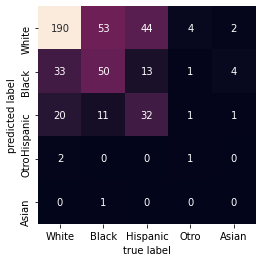

In [389]:
razas={'White':0, 'Black':1, 'Hispanic':2, 'Otro':3, 'Asian':4}
mat = confusion_matrix(y_test, y_pred_gb)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
    xticklabels=list(razas.keys()),
    yticklabels=list(razas.keys())
           )
plt.xlabel('true label')
plt.ylabel('predicted label');

### Se observa que por el desbalanceo de las clases a medida que la matriz tiende hacia las clases minoritarias pierde la capaicidad de predecir las clases

#### Se realiza un intento de crear una red neuronal densa de 3 capas ocultas cada una con 1024 neuronas, pero realmente el resultado fue mejor que los modelos de cladificación

In [390]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(1024, activation='relu', input_shape=input_shape),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(1024, activation='relu'),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(1024, activation='relu'),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(5),
])

<AxesSubplot:>

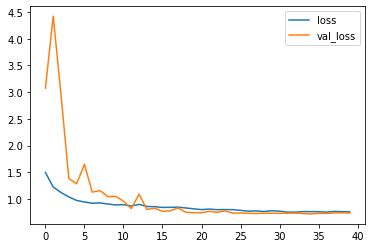

In [391]:
model.compile(
    optimizer='adam',
    loss='mae',
    metrics = ['accuracy']
)

history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    batch_size=256,
    epochs=40,
    verbose=0,
)


# Show the learning curves
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot()

In [392]:
    test_loss, test_accuracy = model.evaluate(X_test, y_test)
    print(test_accuracy)

15/15 [==============================] - 0s 5ms/step - loss: 0.7363 - accuracy: 0.1425
0.1425485908985138
